<h1 style='color: green; font-size: 36px; font-weight: bold;'>Atividade - Inteligência Artificial/Estatística</h1>

# <font color='red' style='font-size: 30px;'>1. Descrição do problema</font>
<hr style='border: 2px solid red;'>

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>A base de dados contém todos os acidentes que aconteceram em rodovias
federais (BRs) nos anos de 2019, 2020 e 2021. Os dados foram fornecidos
pela própria Polícia Rodoviária Federal em seu site. </p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo deste treinamento será estimar um modelo de <b>Machine Learning</b> utilizando a técnica de <b>SVC - Classificação de vetores C-Support</b> para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o <b>RISCO DE OCORRÊNCIA DE ACIDENTES GRAVES</b>. No final do projeto teremos um modelo de previsão para o RISCO DE OCORRÊNCIA DE ACIDENTES GRAVES segundo os inputs de um conjunto de variáveis (X's).</p>



# <font color='red' style='font-size: 30px;'>2. Pré-processamento dos dados</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas


In [243]:
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date, time
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import math


warnings.filterwarnings('ignore')

## Leitura dos dados

In [244]:
dados = pd.read_csv("database.csv", sep=";", parse_dates = ['data_inversa'])

## Visualizar os dados

In [245]:
dados

,id,pesid,data_inversa,uf,br,km,fase_dia,condicao_metereologica,tipo_pista,tracado_via,...,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,ano_ocorrencia
0,389058,869091,2021-11-10,AM,174,977,Pleno dia,Céu Claro,Simples,Não Informado,...,2011,Passageiro,Lesões Leves,0,Masculino,0,1,0,0,2021
1,364848,812950,2021-06-18,RS,158,"566,2",Pleno dia,Céu Claro,Simples,Não Informado,...,2011,Passageiro,Ileso,0,Masculino,1,0,0,0,2021
2,346247,772989,2021-03-14,SC,101,223,Plena Noite,Chuva,Dupla,Não Informado,...,2011,Passageiro,Lesões Leves,0,Ignorado,0,1,0,0,2021
3,404482,904519,2021-12-28,SC,101,50,Pleno dia,Sol,Múltipla,Desvio Temporário,...,2011,Passageiro,Lesões Leves,0,Masculino,0,1,0,0,2021
4,404388,904207,2021-12-27,SC,280,"99,1",Pleno dia,Chuva,Simples,Curva,...,2011,Passageiro,Lesões Leves,0,Masculino,0,1,0,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460525,294738,655335,2020-11-07,GO,153,615,Pleno dia,Céu Claro,Dupla,Reta,...,1900,Condutor,Lesões Leves,61,Masculino,0,1,0,0,2020
460526,201653,452470,2019-06-04,MG,40,"110,2",Plena Noite,Céu Claro,Simples,Reta,...,1900,Condutor,Não Informado,61,Não Informado,0,0,0,0,2019
460527,298823,665673,2020-01-08,MT,364,"203,8",Plena Noite,Céu Claro,Dupla,Não Informado,...,1900,Condutor,Ileso,61,Masculino,1,0,0,0,2020
460528,267624,598469,2020-06-02,BA,101,"181,2",Pleno dia,Céu Claro,Simples,Reta,...,1900,Condutor,Lesões Graves,63,Masculino,0,0,1,0,2020


In [246]:
# Verificando as informações sobre os dataframe, incluindo a memória
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460530 entries, 0 to 460529
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      460530 non-null  int64         
 1   pesid                   460530 non-null  int64         
 2   data_inversa            460530 non-null  datetime64[ns]
 3   uf                      460530 non-null  object        
 4   br                      460530 non-null  int64         
 5   km                      460530 non-null  object        
 6   fase_dia                460530 non-null  object        
 7   condicao_metereologica  460530 non-null  object        
 8   tipo_pista              460530 non-null  object        
 9   tracado_via             460530 non-null  object        
 10  uso_solo                460530 non-null  object        
 11  tipo_veiculo            460530 non-null  object        
 12  ano_fabricacao_veiculo  460530

## Verificando o tamanho do dataset

In [247]:
dados.shape

(460530, 22)

## Conhecendo os atributos que servirão de análise

mortos
0    444527
1     16003
dtype: int64


<AxesSubplot:xlabel='mortos'>

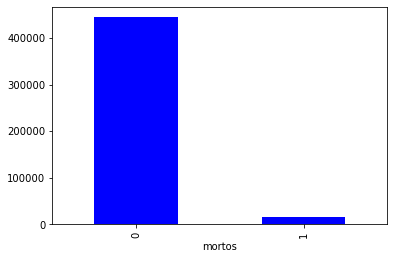

In [249]:
# Agrupando acidentes por mortes

agrupar_morte = dados.groupby(['mortos']).size()
print(agrupar_morte)
# verificando em um gráfico de barras
agrupar_morte.plot.bar(color = 'blue')

In [250]:
# Verificando o total de mortes
Total_mortos = dados['mortos'].sum()
print('Mortos = ', Total_mortos)
Total_ilesos = dados['ilesos'].sum()
print('Ilesos = ', Total_ilesos)
Total_feridos_leves = dados['feridos_leves'].sum()
print('Feridos leves = ', Total_feridos_leves)
Total_feridos_graves = dados['feridos_graves'].sum()
print('Feridos graves = ', Total_feridos_graves)

Mortos =  16003
Ilesos =  192732
Feridos leves =  168952
Feridos graves =  53267


In [251]:
total_acidentes = dados.shape[0]
total_acidentes

460530

In [252]:
#Observando a porcentagem das mortes em relação ao número total de acidentes

total_acidentes = dados.shape[0]
acidentes1 = round(dados[['ilesos','mortos','feridos_leves','feridos_graves']].sum()/total_acidentes * 100, 1)
acidentes1

ilesos            41.9
mortos             3.5
feridos_leves     36.7
feridos_graves    11.6
dtype: float64

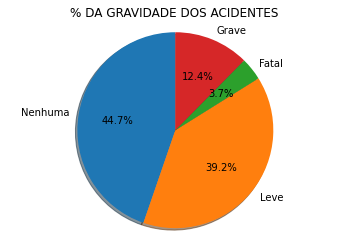

In [253]:
# Verificando em um gráfico de pizza
labels = 'Nenhuma', 'Leve','Fatal','Grave'
percentagem = [ 41.9, 36.7,3.5,11.6]

fig1, ax1 = plt.subplots()
ax1.pie(percentagem, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal')

#Título do gráfico
ax1.set_title('% DA GRAVIDADE DOS ACIDENTES')

plt.show()


# Verificando os dados acima, percebe-se que o número de mortes, em relação ao total de pessoas envolvidas, é relativamente baixo(3,5%), de forma que isso pode prejudicar a classificação nos algoritmos de Machine Learning(ML)


# Entretanto, percebi que posso agregar os acidentes graves, juntamente aos fatais, fato de maior relevância para todo o estudo.

In [254]:
dados.corr()

,id,pesid,br,ano_fabricacao_veiculo,idade,ilesos,feridos_leves,feridos_graves,mortos,ano_ocorrencia
id,1.000000,0.999895,-0.016639,0.002997,-0.004915,-0.003403,-0.015519,0.007059,0.009155,0.941269
pesid,0.999895,1.000000,-0.016772,0.003044,-0.004976,-0.003316,-0.015519,0.007120,0.008501,0.941395
br,-0.016639,-0.016772,1.000000,-0.004895,0.005793,-0.008583,-0.006173,0.016832,0.010094,-0.018337
ano_fabricacao_veiculo,0.002997,0.003044,-0.004895,1.000000,0.020196,0.006799,-0.006730,-0.001868,0.000403,0.003785
idade,-0.004915,-0.004976,0.005793,0.020196,1.000000,0.102326,-0.097173,-0.026290,0.028506,0.001648
ilesos,-0.003403,-0.003316,-0.008583,0.006799,0.102326,1.000000,-0.645770,-0.306807,-0.160963,-0.002704
feridos_leves,-0.015519,-0.015519,-0.006173,-0.006730,-0.097173,-0.645770,1.000000,-0.275293,-0.144430,-0.011671
feridos_graves,0.007059,0.007120,0.016832,-0.001868,-0.026290,-0.306807,-0.275293,1.000000,-0.068619,0.003102
mortos,0.009155,0.008501,0.010094,0.000403,0.028506,-0.160963,-0.144430,-0.068619,1.000000,0.006521
ano_ocorrencia,0.941269,0.941395,-0.018337,0.003785,0.001648,-0.002704,-0.011671,0.003102,0.006521,1.000000


In [255]:
dados.columns

Index(['id', 'pesid', 'data_inversa', 'uf', 'br', 'km', 'fase_dia',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'tipo_veiculo', 'ano_fabricacao_veiculo', 'tipo_envolvido',
       'estado_fisico', 'idade', 'sexo', 'ilesos', 'feridos_leves',
       'feridos_graves', 'mortos', 'ano_ocorrencia'],
      dtype='object')

# A partir da visualização dos principais atributos, será realizado uma junção de dois atributos do dataset : "mortos" + "feridos_graves". 

In [256]:
# CRIANDO O DATAFRAME 'risco_grave" COM APENAS OS ATRIBUTOS mortos e feridos_graves
risco_grave = pd.read_csv("database.csv", sep=';',encoding='latin-1', usecols=[19,20])
risco_grave.sample(10)

,feridos_graves,mortos
317124,0,1
451449,0,0
21604,0,0
378157,0,0
197877,0,0
202579,0,0
411698,0,0
21772,0,0
183806,0,0
59967,0,0


In [257]:
risco_grave.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460530 entries, 0 to 460529
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   feridos_graves  460530 non-null  int64
 1   mortos          460530 non-null  int64
dtypes: int64(2)
memory usage: 7.0 MB


In [258]:
#criando a coluna 'risco', que será a CLASSE do nosso estudo,  para unir(SOMAR) os valores de 'mortos' + 'feridos_graves'
risco_grave['risco'] = risco_grave.sum(axis=1)
risco_grave.head(10)

,feridos_graves,mortos,risco
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,1,0,1
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [259]:
# Somando as mortes com feridos_graves
total_risco_grave = risco_grave['risco'].sum()
total_mortos = risco_grave['mortos'].sum()
total_feridos_graves = risco_grave['feridos_graves'].sum()
print( f" O número de pessoas que morreram ou tiveram ferimentos graves foi: {total_risco_grave}")
print( f" O número de pessoas que morreram  foi: {total_mortos}")
print( f" O número de pessoas que tiveram ferimentos graves foi: {total_feridos_graves}")


 O número de pessoas que morreram ou tiveram ferimentos graves foi: 69270
 O número de pessoas que morreram  foi: 16003
 O número de pessoas que tiveram ferimentos graves foi: 53267


In [260]:
# removendo os atributos 'mortos' e 'feridos_graves'
risco = risco_grave.drop(columns=['mortos', 'feridos_graves'])
risco

,risco
0,0
1,0
2,0
3,0
4,0
...,...
460525,0
460526,0
460527,0
460528,1


In [261]:
risco_backup = risco.copy()

In [262]:
#TRANSFORMANDO O DATAFRAME EM BOOLEANO
risco2 = risco.astype(bool)
risco2.head(20)

## VALORES = 0 >>>> ASSUMEM O VALOR FALSE
## VALORES DIFERENTES DE 0 >>>> VALOR TRUE >> REPRESENTA OS ACIDENTES FATAIS OU COM RISCO GRAVE

,risco
0,False
1,False
2,False
3,False
4,False
5,True
6,False
7,False
8,False
9,False


In [263]:
# Em relação ao agrupamento abaixo, impende informar que os valores "True" 
# NÃO INDICAM o número de pessoas que se acidentaram de forma grave ou morreram. 
# Esse valor indica o NUMERO DE ACIDENTES em que houve morte ou pessoas gravemente feridas. 

agrupar_risco= risco2.groupby('risco').size()
print(agrupar_risco)

risco
False    391260
True      69270
dtype: int64


In [264]:
# unindo o df dados com o risco2

risco_acidentes = pd.concat([dados,risco2], axis=1, join='inner')

In [266]:
risco_acidentes.shape
#NOVO DATAFRAME COM UMA COLUNA A MAIS, JUSTAMENTE A COLUNA 'risco' QUE SERÁ A NOSSA CLASSE

(460530, 23)

## O dataframe risco_acidentes passa a ser o dataframe de análise, porque nele agora contempla a coluna de valor para esse projeto, no caso a coluna "risco"

In [267]:
risco_acidentes.head()

,id,pesid,data_inversa,uf,br,km,fase_dia,condicao_metereologica,tipo_pista,tracado_via,...,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos,ano_ocorrencia,risco
0,389058,869091,2021-11-10,AM,174,977,Pleno dia,Céu Claro,Simples,Não Informado,...,Passageiro,Lesões Leves,0,Masculino,0,1,0,0,2021,False
1,364848,812950,2021-06-18,RS,158,"566,2",Pleno dia,Céu Claro,Simples,Não Informado,...,Passageiro,Ileso,0,Masculino,1,0,0,0,2021,False
2,346247,772989,2021-03-14,SC,101,223,Plena Noite,Chuva,Dupla,Não Informado,...,Passageiro,Lesões Leves,0,Ignorado,0,1,0,0,2021,False
3,404482,904519,2021-12-28,SC,101,50,Pleno dia,Sol,Múltipla,Desvio Temporário,...,Passageiro,Lesões Leves,0,Masculino,0,1,0,0,2021,False
4,404388,904207,2021-12-27,SC,280,"99,1",Pleno dia,Chuva,Simples,Curva,...,Passageiro,Lesões Leves,0,Masculino,0,1,0,0,2021,False


# Verificando o balanceamento da coluna alvo [risco]

Text(0, 0.5, 'Qtide')

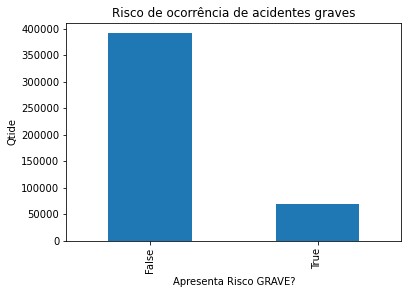

In [269]:
ax = risco_acidentes['risco'].value_counts().plot(kind="bar", title='Risco de ocorrência de acidentes graves')
ax.set_xlabel("Apresenta Risco GRAVE?")
ax.set_ylabel("Qtide")

# Conclusão:  Apresenta desbalanceamento de alto nível, precisaremos aplicar técnicas de balanceamento

## - Continua o pré-processamento

# Os atributos desnecessários são aqueles que julgo que não possuem alta relevância para o entendimento da situação de risco de um acidente

In [270]:
# remover atributos desnecessários
risco_acidentes = risco_acidentes.drop(labels = ['pesid', 'id','data_inversa','ano_fabricacao_veiculo', 'tipo_envolvido', 'sexo', 'ilesos', 'idade', 'feridos_leves', 'feridos_graves', 'mortos', 'ano_ocorrencia', 'estado_fisico', 'tipo_veiculo'], axis=1)
risco_acidentes.head()

,uf,br,km,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,risco
0,AM,174,977,Pleno dia,Céu Claro,Simples,Não Informado,Não,False
1,RS,158,"566,2",Pleno dia,Céu Claro,Simples,Não Informado,Sim,False
2,SC,101,223,Plena Noite,Chuva,Dupla,Não Informado,Não,False
3,SC,101,50,Pleno dia,Sol,Múltipla,Desvio Temporário,Não,False
4,SC,280,"99,1",Pleno dia,Chuva,Simples,Curva,Não,False


In [271]:
# Consultando linhas com valore faltantes.
risco_acidentes.isnull().sum().sort_values(ascending=False)

uf                        0
br                        0
km                        0
fase_dia                  0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
risco                     0
dtype: int64

In [272]:
risco_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460530 entries, 0 to 460529
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   uf                      460530 non-null  object
 1   br                      460530 non-null  int64 
 2   km                      460530 non-null  object
 3   fase_dia                460530 non-null  object
 4   condicao_metereologica  460530 non-null  object
 5   tipo_pista              460530 non-null  object
 6   tracado_via             460530 non-null  object
 7   uso_solo                460530 non-null  object
 8   risco                   460530 non-null  bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 28.5+ MB


# Transformando as variavéis do tipo string e tratando a variável km 

In [273]:
from sklearn.preprocessing import LabelEncoder

In [274]:
transformar_uf = {'AC': 0,
    'AL': 1,
    'AP': 2,
    'AM': 3,
    'BA': 4,
    'CE': 5,
    'DF': 6,
    'ES': 7,
    'GO': 8,
    'MA': 9,
    'MT': 10,
    'MS': 11,
    'MG': 12,
    'PA': 13,
    'PB': 14,
    'PR': 15,
    'PE': 16,
    'PI': 17,
    'RJ': 18,
    'RN': 19,
    'RS': 20,
    'RO': 21,
    'RR': 22,
    'SC': 23,
    'SP': 24,
    'SE': 25,
    'TO': 26}

transformar_fase = {'Plena Noite' : 0, 'Amanhecer' : 1, 'Pleno dia' : 2, 'Anoitecer' : 3}

transformar_condicao = {'Céu Claro' : 0, 'Nublado' : 1, 'Chuva' : 2, 'Garoa/Chuvisco' : 3, 'Ignorado' : 4,
                                 'Nevoeiro/Neblina' : 5, 'Vento' : 6, 'Sol' : 7,  'Granizo' : 8, 'Neve': 9}

tranformar_tipo_pista = {'Múltipla' : 0, 'Dupla' : 1, 'Simples' : 2}


transformar_tracado_via = {'Curva' : 0, 'Reta' : 1, 'Viaduto' : 2, 'Interseção de vias' : 3, 'Não Informado' : 4, 'Rotatória' : 5,
                         'Desvio Temporário' : 6, 'Retorno Regulamentado' : 7, 'Túnel' : 8, 'Ponte' : 9}

transformar_uso_solo = { 'Sim' : 1, 'Não' : 0 }

tranformar_risco = { False : 0, True : 1}

risco_acidentes.replace({'uf': transformar_uf, 
                 'fase_dia': transformar_fase,
                 'condicao_metereologica' : transformar_condicao,
                 'tipo_pista' : tranformar_tipo_pista,
                 'tracado_via' : transformar_tracado_via,
                 'uso_solo' : transformar_uso_solo,
                 'risco' : tranformar_risco ,
                }, inplace=True)

In [275]:
risco_acidentes.head()

,uf,br,km,fase_dia,condicao_metereologica,tipo_pista,tracado_via,uso_solo,risco
0,3,174,977,2,0,2,4,0,0
1,20,158,"566,2",2,0,2,4,1,0
2,23,101,223,0,2,1,4,0,0
3,23,101,50,2,7,0,6,0,0
4,23,280,"99,1",2,2,2,0,0,0


In [276]:
labelencoder = LabelEncoder()
risco_acidentes['km'] = labelencoder.fit_transform(risco_acidentes['km'])

In [277]:
risco_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460530 entries, 0 to 460529
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   uf                      460530 non-null  int64
 1   br                      460530 non-null  int64
 2   km                      460530 non-null  int32
 3   fase_dia                460530 non-null  int64
 4   condicao_metereologica  460530 non-null  int64
 5   tipo_pista              460530 non-null  int64
 6   tracado_via             460530 non-null  int64
 7   uso_solo                460530 non-null  int64
 8   risco                   460530 non-null  int64
dtypes: int32(1), int64(8)
memory usage: 29.9 MB


# Balanceando a variável alvo (RISCO)

In [278]:
# Verifiando a quantidade de valores únicos da coluna risco 
risco_acidentes.risco.value_counts()

0    391260
1     69270
Name: risco, dtype: int64

# Irei balancear através do valor mais baixo

In [279]:
data_analise = risco_acidentes[risco_acidentes.risco==0].sample(69270)

In [280]:
data = data_analise.append(risco_acidentes[risco_acidentes.risco==1].sample(69270))

In [281]:
data.risco.value_counts()

0    69270
1    69270
Name: risco, dtype: int64

Text(0, 0.5, 'Qtide')

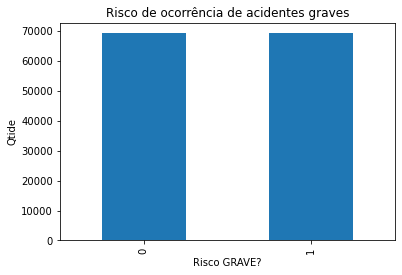

In [283]:
# a coluna alvo depois de ser balanceada
ax = data['risco'].value_counts().plot(kind="bar", title='Risco de ocorrência de acidentes graves')
ax.set_xlabel("Risco GRAVE?")
ax.set_ylabel("Qtide")

## Agora os nossos dados estão devidamente pré-processados para seguirem para aplicação do modelo de machine learning

# <font color='red' style='font-size: 30px;'>3. Escolha do algoritmo</font>
<hr style='border: 2px solid red;'>

In [ ]:
## SVC
<hr>

documentação: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Como o nosso modelo busca prever se há a eminência de risco grave para um possivel acidentes, a resolução deste problema deve se tratar de uma classificação.
Ou seja, a nossa máquina preditiva deve ser capaz de classificar o risco grave de um acidente, em verdadeiro ou falso. Dessa forma, o modelo deve se tratar de um classificador.    </p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> O algoritmo escolhido para este problema é o SVC - Classificação de vetores C-Support. A implementação é baseada em libsvm. O tempo de ajuste escala pelo menos quadraticamente com o número de amostras e pode ser impraticável além de dezenas de milhares de amostras.</p>


In [228]:
y = risco_acidentes['risco']

In [229]:
x = risco_acidentes[['uf', 'br', 'km', 'fase_dia', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo']]

In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 345397 elementos e testaremos com 115133 elementos
A acurácia foi 84.96%


## Criando um simulador simples

In [240]:
teste = np.array([[25,116.0,3175,3,7,2,1,1]])

In [241]:
modelo.predict(teste)

array([0], dtype=int64)